### Support Vector Machines
They try to maximize margin of classification between the decision boundary and nearest data point, these nearest data points are called support vectors.

The boundary could be: 
-   line       ---> 2D feature space
-   plane      ---> 3D feature space
-   hyperplane ---> ND feature space

Gamma:
- support vectors considered to decide the decision boundary.

Regularization(C):
- High regularization usually overfits by creating a more complex  decision boundary which tries minimizes error.
Low regularization may have a more simpler boundary which is prone to errors but is usually considered better.

For extremely complex datasets ---> augment a dimension by transforming existing features.
---> this augmented/created dimension is called a kernel.

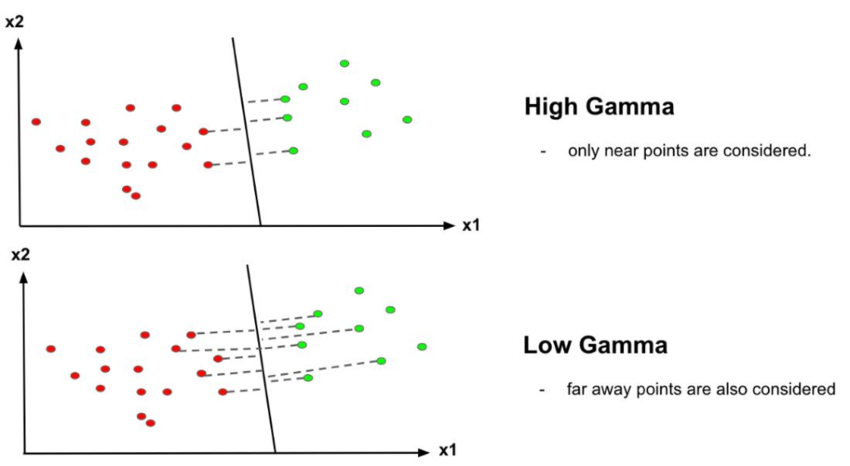
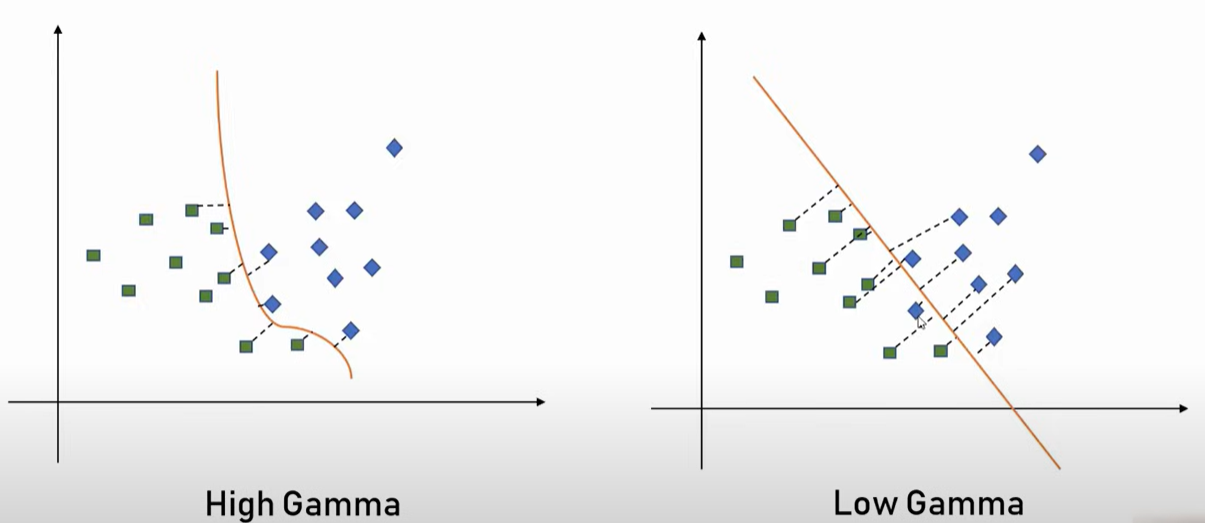

In [85]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from sklearn.svm import SVC

In [35]:
iris = load_iris()
print(dir(iris))
print()
print("features: ", iris.feature_names)
print("target: ", iris.target_names)


['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']

features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target:  ['setosa' 'versicolor' 'virginica']


In [30]:
# creating a dataframe from the provided data
df = pd.DataFrame(iris.data, columns=(iris.feature_names))
# adding the target column to the dataframe
df["target"] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [45]:
# Data Exploration
df[df.target==2].head() # 50 samples each

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [92]:
df["flower name"] = df.target.apply(lambda x: iris.target_names[x]) # lambda to add target name
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [93]:
dfa = df[df.target==0]
dfb = df[df.target==1]
dfc = df[df.target==2]

In [94]:
dfa.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [95]:
dfb.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [96]:
dfc.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


Text(0, 0.5, 'sepal width (cm)')

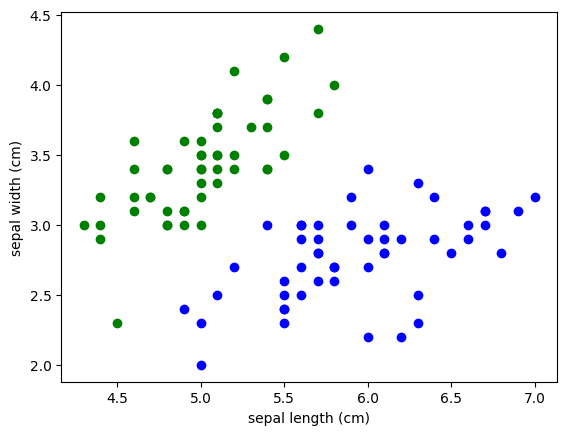

In [97]:
plt.scatter(dfa["sepal length (cm)"], dfa["sepal width (cm)"], color='green')
plt.scatter(dfb["sepal length (cm)"], dfb["sepal width (cm)"], color='blue')
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")

Text(0, 0.5, 'petal width (cm)')

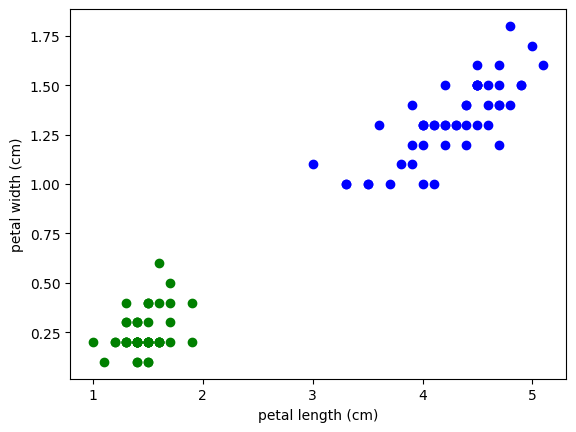

In [98]:
plt.scatter(dfa["petal length (cm)"], dfa["petal width (cm)"], color='green')
plt.scatter(dfb["petal length (cm)"], dfb["petal width (cm)"], color='blue')
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

In [99]:
# independent and dependent vars ---> test train split ---> 70-30
X = df.drop(["target", "flower name"], axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [100]:
# training the classifier

model = SVC()
model.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [102]:
# Accuracy score of 100% due to less examples and clear decision boundaries visible.
# rbf - The radial basis function (RBF) kernel, also known as the Gaussian kernel
#       Measures the similarity between two data points based on their Euclidean distance 

model.score(X_test, y_test)

1.0

In [104]:
linear_svc_model = SVC(kernel='linear')
linear_svc_model.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [105]:
linear_svc_model.score(X_test, y_test) # same accuracy score with a linear kernel

1.0